In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

#load the dataset
df = pd.read_csv("C:\\Users\\drax4\\p1_churn_analysis\\data\\telco customer churn.csv")


#show first 5 rows

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Show the datatypes
df.info()

#check for missing values
print("\nMissing values:\n",df.isnull().sum())

#basic statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
print("TotalCharges nulls after conversion:", df['TotalCharges'].isnull().sum())


TotalCharges nulls after conversion: 11


In [9]:
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)


In [10]:
#drop customerID
df.drop('customerID', axis=1, inplace=True)


In [11]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


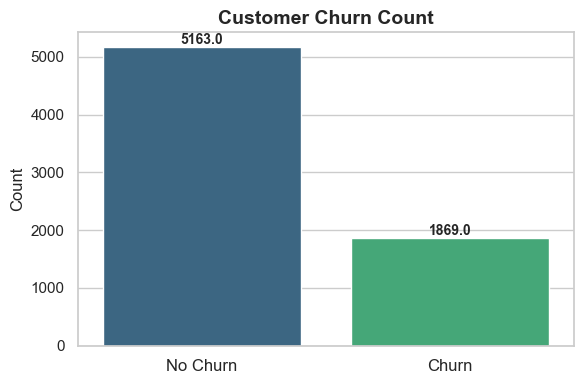

In [16]:
# Create the plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='viridis', legend=False)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Fix x-tick labels safely
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Churn', 'Churn'], fontsize=12)

# Labels & Title
plt.title('Customer Churn Count', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


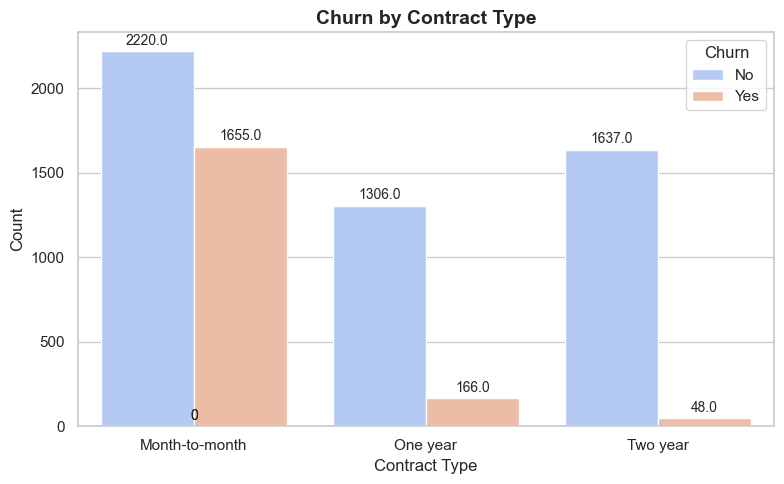

In [17]:
#code for churn by contract type

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height + 20),
                ha='center', va='bottom', fontsize=10)

# Styling
plt.title('Churn by Contract Type', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Contract Type')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

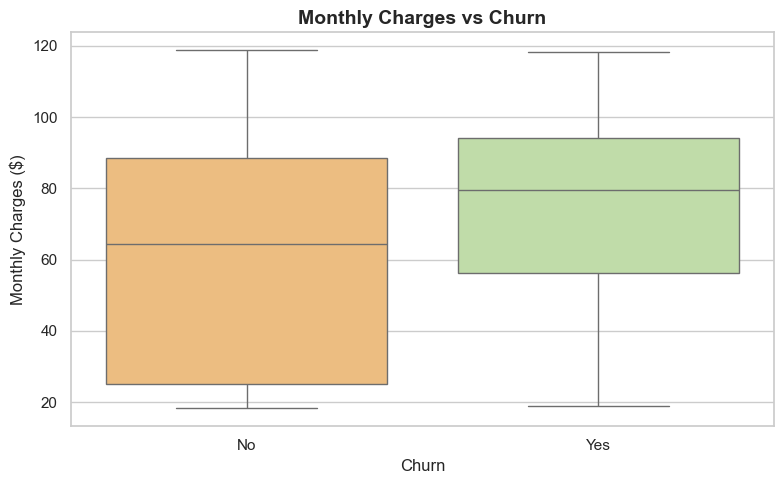

In [19]:
#code for Churn vs. Monthly Charges

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Spectral', legend=False)

plt.title('Monthly Charges vs Churn', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

In [ ]:
#There’s a visible trend showing churners tend to have higher monthly charges. This insight can be used to build pricing strategies aimed at customer retention.

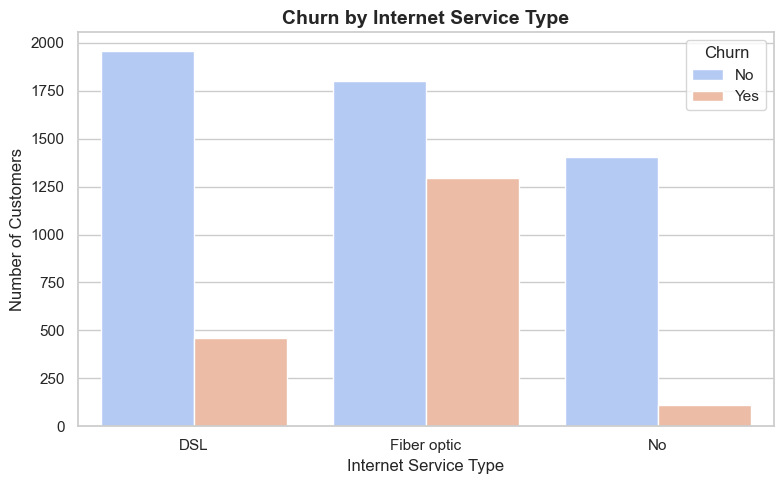

In [20]:
#code for Churn Rate by Internet Service Type

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')

plt.title('Churn by Internet Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

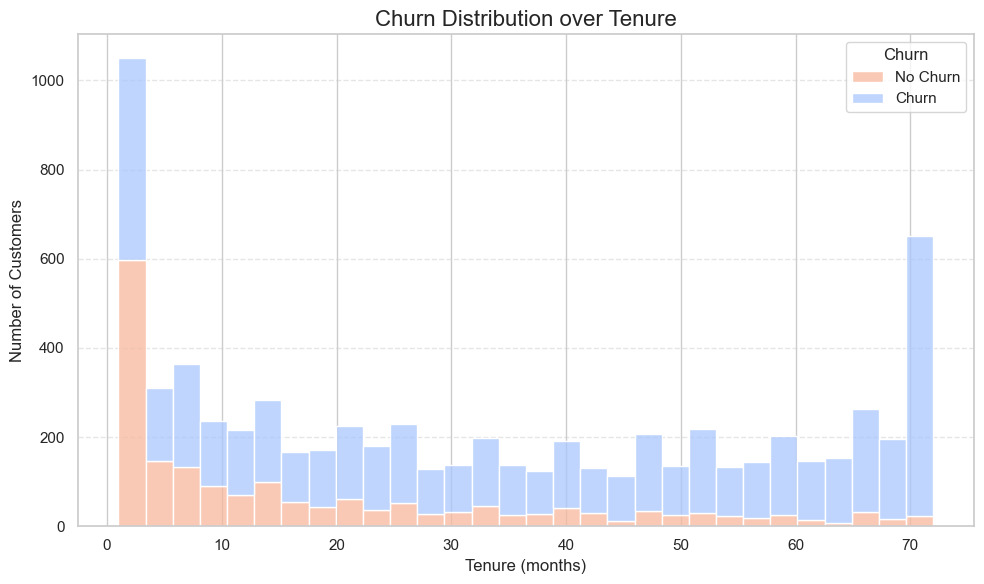

In [21]:
#code for tunure vs churn

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, palette='coolwarm', kde=False, multiple='stack')
plt.title('Churn Distribution over Tenure', fontsize=16)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

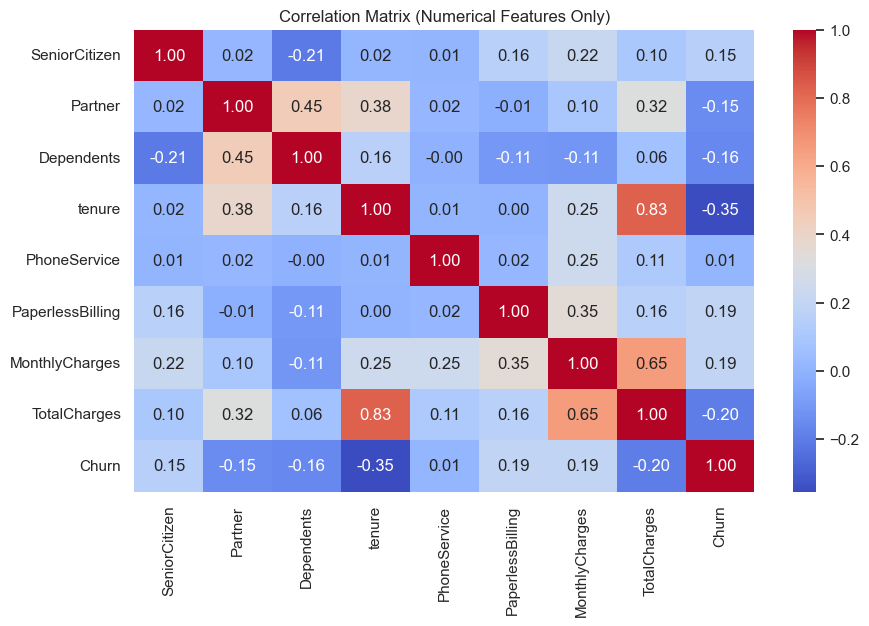

In [23]:
#Correlation Heatmap (Numerical Features)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features Only)')
plt.show()


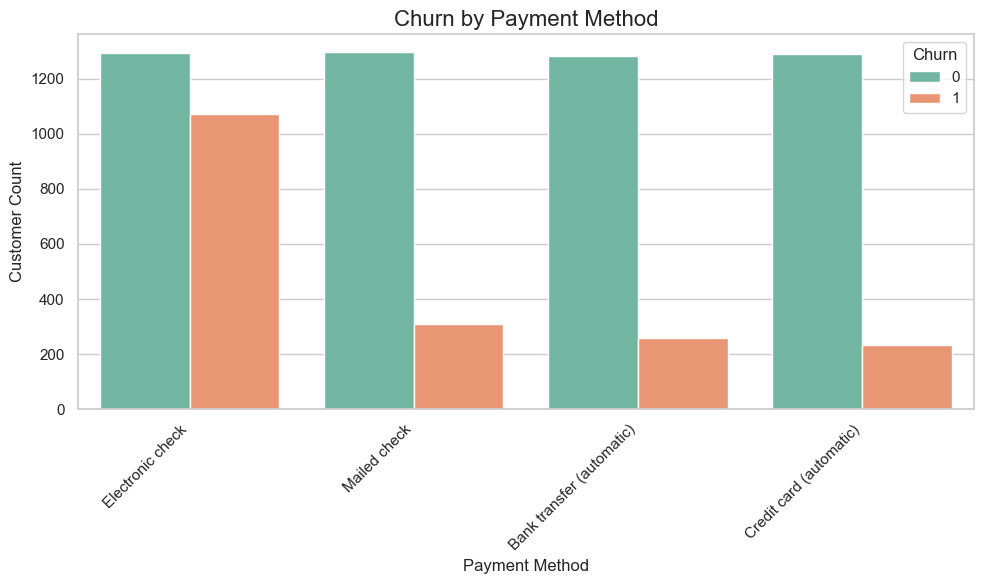

In [24]:
# code for Payment Method vs Churn (Bar Plot)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')

plt.title('Churn by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [ ]:
# Customer Segmentation Using Clustering

from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
cluster_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# Fill any missing values
cluster_data = cluster_data.fillna(cluster_data.mean())

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)




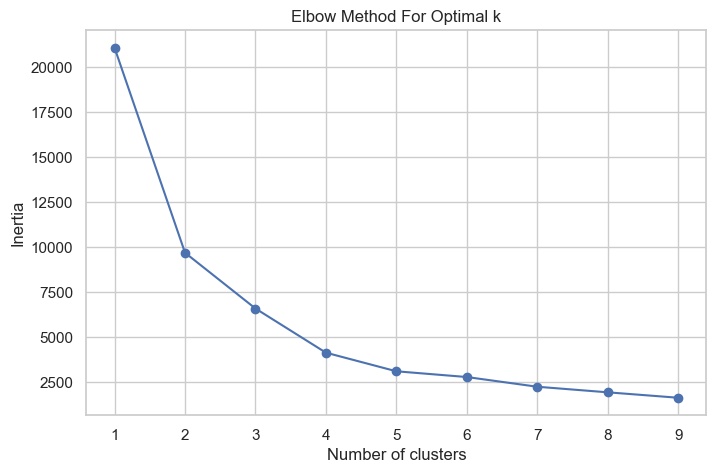

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()



In [30]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


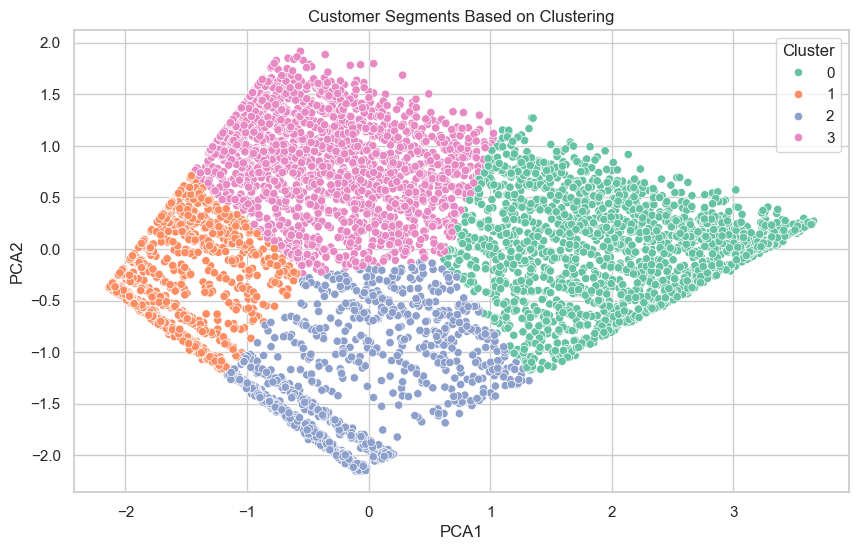

In [31]:
import seaborn as sns

# Reduce dimensions to 2D for visualization (using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to the DataFrame
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments Based on Clustering')
plt.show()


In [32]:
# Analyze the average characteristics of each cluster
cluster_profiles = df.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].mean().round(2)
display(cluster_profiles)


,tenure,MonthlyCharges,TotalCharges,Churn
Cluster,,,,
0,59.46,93.21,5536.82,0.15
1,10.26,31.78,303.58,0.25
2,53.56,34.72,1825.26,0.05
3,15.41,80.77,1249.04,0.48


In [34]:
# Make a copy to work with
model_data = df.copy()

# Drop customerID if present
if 'customerID' in model_data.columns:
    model_data.drop('customerID', axis=1, inplace=True)

# Target variable
y = model_data['Churn']  # Already encoded as 0 and 1

# Features
X = model_data.drop('Churn', axis=1)


In [35]:
#  Preprocessing – Encoding + Scaling

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Separate types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Build ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])


In [36]:
# Apply transformation
X_processed = preprocessor.fit_transform(X)


In [37]:
#split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
#model training - logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [39]:
#logistic regression - evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8031272210376688

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Confusion Matrix:
 [[917 116]
 [161 213]]


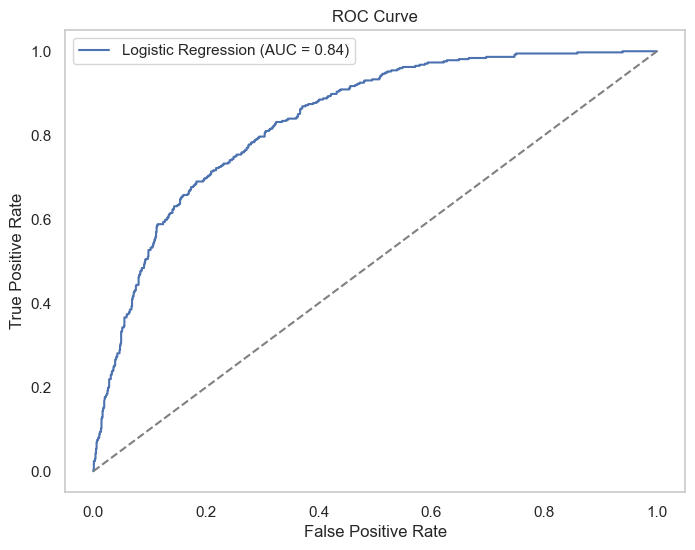

In [40]:
#roc curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [41]:
#trying XGboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Select Features (Numerical + One-hot Encoded Categoricals)
# Note: Use the same feature engineering you used earlier for logistic regression
# Assuming `df` is your cleaned/preprocessed DataFrame

# Drop rows with missing TotalCharges if any
df = df[df['TotalCharges'] != " "]
df['TotalCharges'] = df['TotalCharges'].astype(float)

# One-hot encode categoricals (excluding target)
X = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)
y = df['Churn'].astype(int)

# 3. Scale Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# 6. Evaluate
y_pred_xgb = xgb.predict(X_test)

print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


✅ XGBoost Accuracy: 0.7701421800947867

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      1549
           1       0.58      0.49      0.53       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110


🧩 Confusion Matrix:
 [[1352  197]
 [ 288  273]]


c:\Users\drax4\p1_churn_analysis\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:27:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


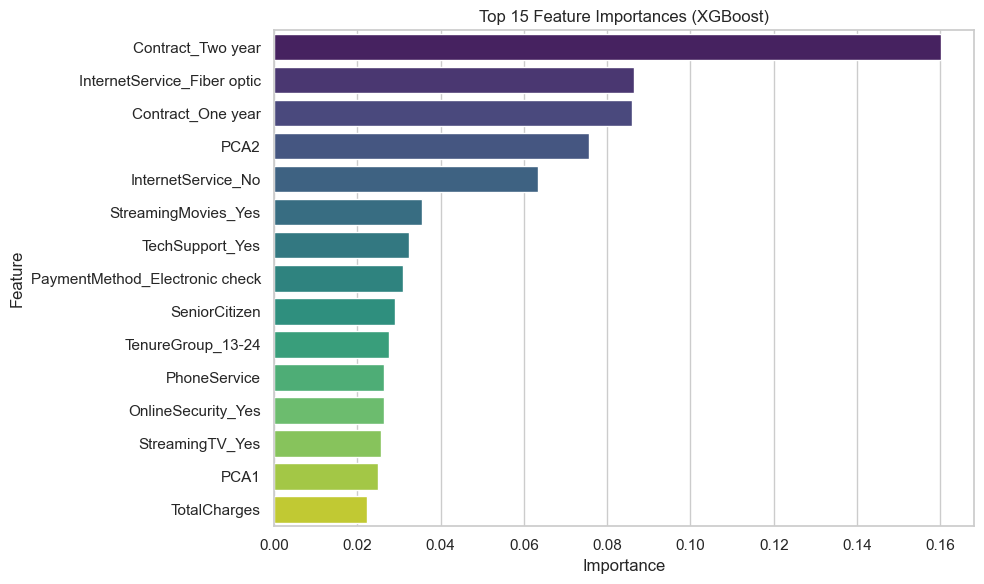

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    hue='Feature',        # assigning hue
    palette='viridis',
    dodge=False,          # prevent overlapping bars
    legend=False          # hide the redundant legend
)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


In [49]:
#export cleaned data

df.to_csv('cleaned_telco_data.csv', index=False)


In [51]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv('C:\\Users\\drax4\\p1_churn_analysis\\notebook\\cleaned_telco_data.csv')

# Add 'CustomerID' column starting from 1
df['CustomerID'] = range(1, len(df) + 1)

# Move 'CustomerID' to the first column
df = df[['CustomerID'] + [col for col in df.columns if col != 'CustomerID']]

# Save the updated DataFrame to a new CSV
df.to_csv('cleaned_data_final.csv', index=False)

print("✅ New CSV saved as 'cleaned_telco_data_with_id.csv'")



✅ New CSV saved as 'cleaned_telco_data_with_id.csv'
